## Erstellung eines Autoencoders zur Entrauschung von Bildern

Wie trainiert man ein neuronales Netzwerk, um Rauschen mit einem Autoencoder zu entfernen? In dieser Aufgabe wird Schritt für Schritt ein Autoencoder mithilfe des Fashion-MNIST trainiert. Nach dem Training wird die Genauigkeit des Modells überprüft, um festzustellen, wie gut es in der Lage ist, bestimmte Rauschmuster zu erkennen und zu entfernen.

</div>

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 1:</b>
    
Importieren Sie alle benötigten Bibliotheken.
    
</div>

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 2:</b>
    
Laden Sie den Fashion-MNIST Datensatz mit der Funktion `fashion_mnist.load_data()` und teilen Sie den Datensatz in Train/Test auf.
    
</div>

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 3:</b>
    
Normalisieren Sie die Bilddaten auf den Wertebereich von 0 bis 1.
    
</div>

In [ ]:
# Da die Pixel-Werte im Bereich 0-255 liegen, teilen wir durch 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Überprüfen des Wertebereichs
print("Training data shape:", X_train.shape)
print("Min value in training set:", X_train.min())
print("Max value in training set:", X_train.max())

Training data shape: (48000, 28, 28)
Min value in training set: 0.0
Max value in training set: 1.0


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 4:</b>
    
Zeigen Sie eins der Bilder mit der Option `colorbar()` an, um die normaliserten Werte zu überprüfen.
    
</div>

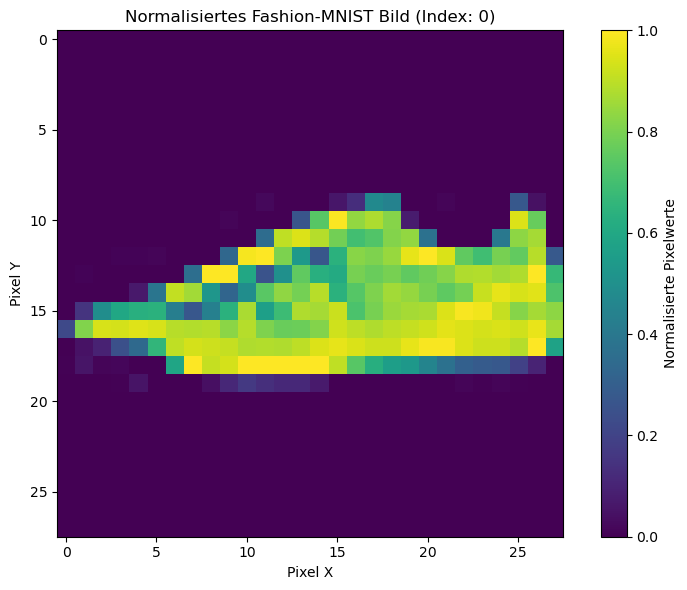

Bildgröße: (28, 28)
Minimaler Pixelwert: 0.0000
Maximaler Pixelwert: 1.0000
Durchschnittlicher Pixelwert: 0.1847


In [ ]:
# Ein Bild aus dem Trainingsset auswählen (z.B. das erste Bild)
image_index = 0
sample_image = X_train[image_index]

# Plot erstellen mit colorbar zur Anzeige der Werte
plt.figure(figsize=(8, 6))
img_plot = plt.imshow(sample_image, cmap='viridis')
plt.colorbar(img_plot, label='Normalisierte Pixelwerte')
plt.title(f"Normalisiertes Fashion-MNIST Bild (Index: {image_index})")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.tight_layout()
plt.show()

# einige Statistiken zum Bild anzeigen
print(f"Bildgröße: {sample_image.shape}")
print(f"Minimaler Pixelwert: {sample_image.min():.4f}")
print(f"Maximaler Pixelwert: {sample_image.max():.4f}")
print(f"Durchschnittlicher Pixelwert: {sample_image.mean():.4f}")

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 5:</b>
    
In diesem Schritt soll den Trainingsbildern ein zufälliges Rauschen hinzugefügt werden. Dazu wird eine Variable `noise_factor` mit dem Wert 0.2 erstellt und mit der Funktion `tf.random.normal()` ein neuer Trainings- und Testdatensatz mit Rauschen erzeugt.

</div>

In [ ]:
noise_factor = 0.2

# Form der Daten für die Rauschgenerierung ermitteln
train_shape = X_train.shape
test_shape = X_test.shape


# Zufallswerte mit Mittelwert 0 und Standardabweichung 1
train_noise = tf.random.normal(shape=train_shape, mean=0.0, stddev=1.0)
test_noise = tf.random.normal(shape=test_shape, mean=0.0, stddev=1.0)

# Rauschen zum ursprünglichen Datensatz hinzufügen und mit noise_factor skalieren
X_train_noisy = X_train + noise_factor * train_noise
X_test_noisy = X_test + noise_factor * test_noise

# Werte auf den Bereich [0,1] beschränken (clipping)
X_train_noisy = tf.clip_by_value(X_train_noisy, 0.0, 1.0)
X_test_noisy = tf.clip_by_value(X_test_noisy, 0.0, 1.0)

# Überprüfen der Ergebnisse
print("Form der verrauschten Trainingsdaten:", X_train_noisy.shape)
print("Minimaler Wert in verrauschten Daten:", tf.reduce_min(X_train_noisy).numpy())
print("Maximaler Wert in verrauschten Daten:", tf.reduce_max(X_train_noisy).numpy())

Form der verrauschten Trainingsdaten: (48000, 28, 28)
Minimaler Wert in verrauschten Daten: 0.0
Maximaler Wert in verrauschten Daten: 1.0


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 6:</b>
    
Zeigen Sie die ersten  10 verrauschten Bilder an.
    
</div>

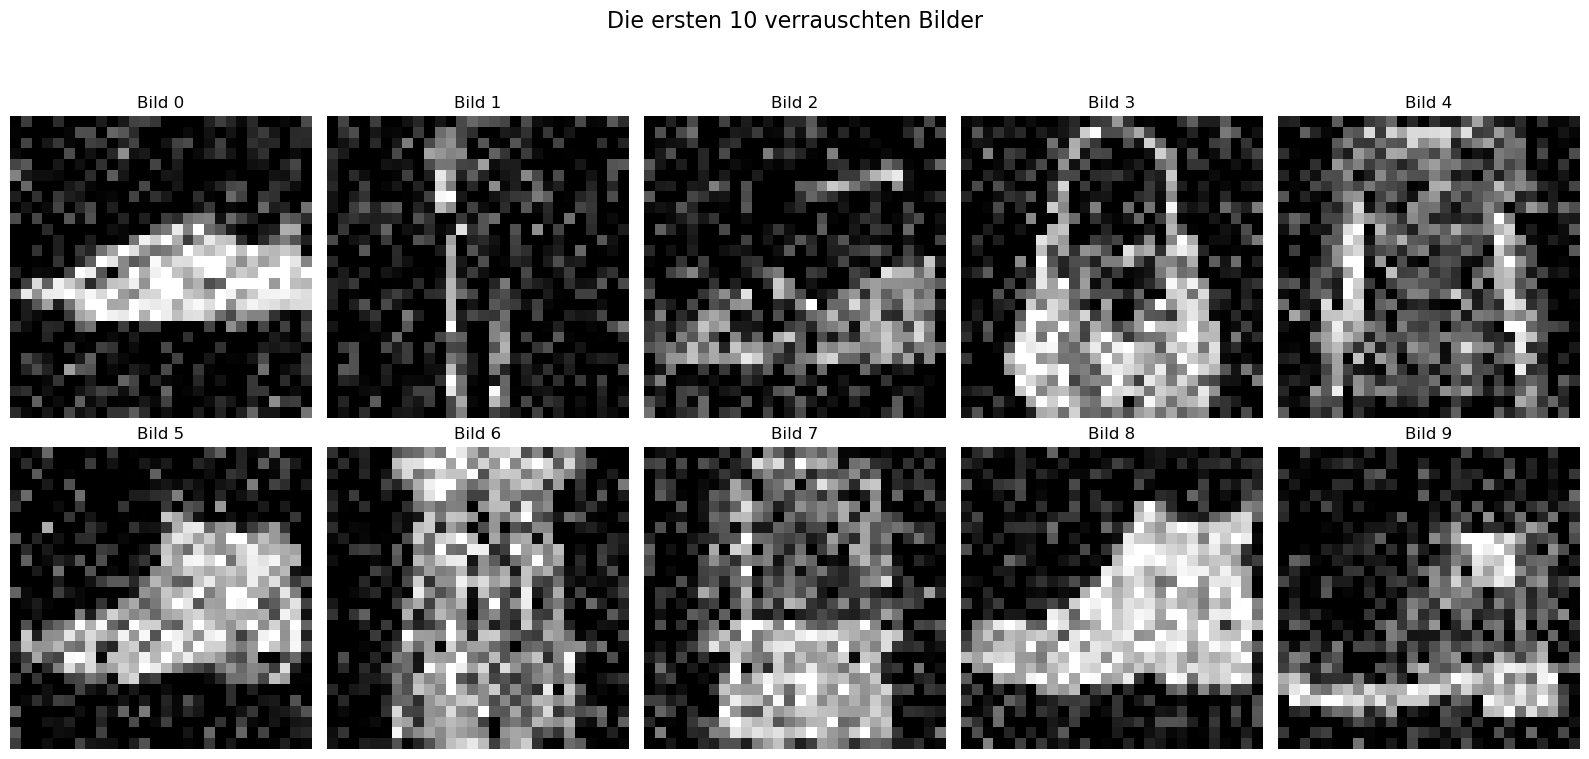

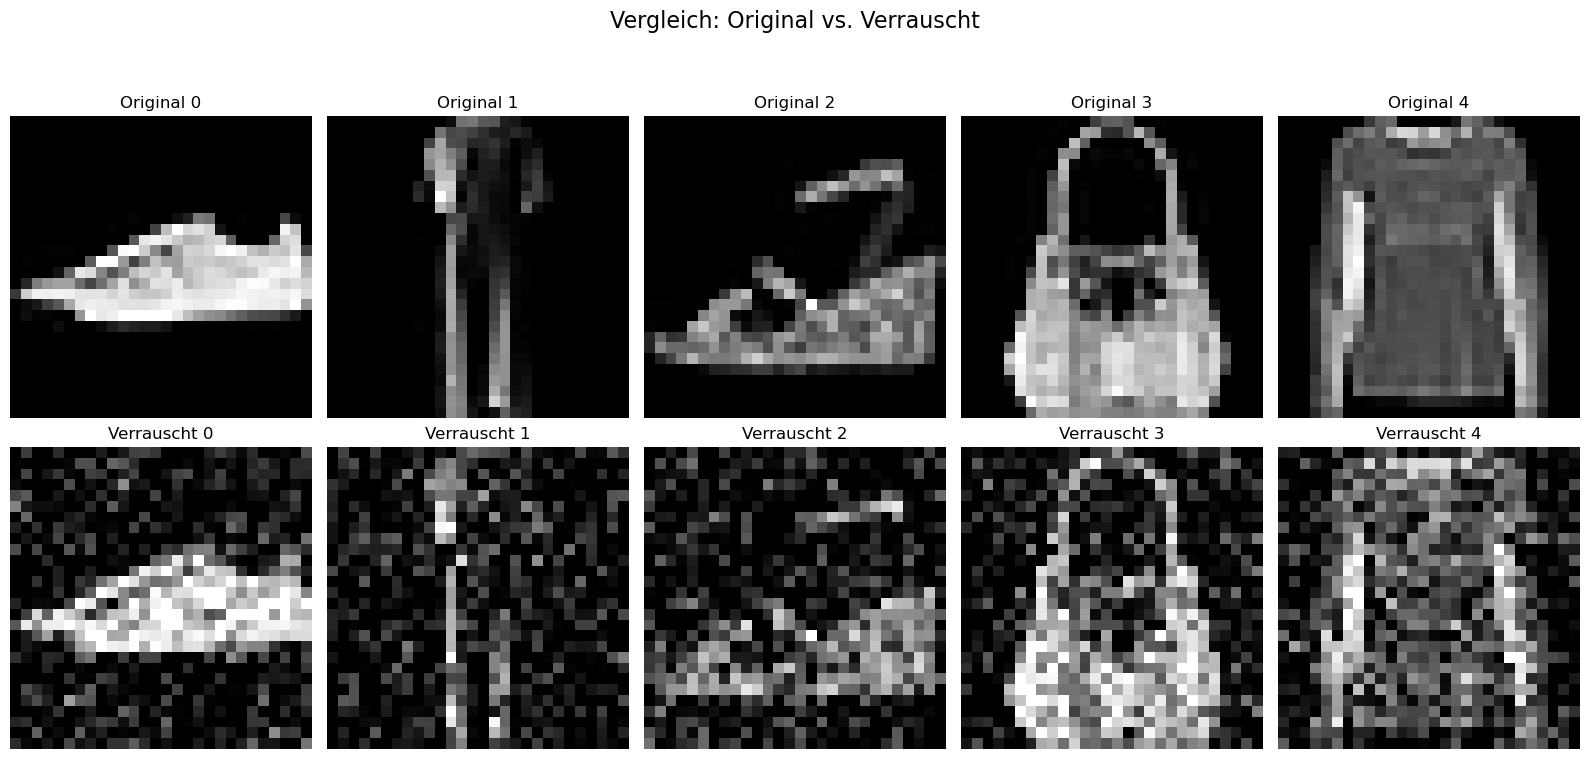

In [ ]:

n = 10  # Anzahl der anzuzeigenden Bilder
plt.figure(figsize=(16, 8))

for i in range(n):
    # Subplot-Position (2 Zeilen, 5 Spalten)
    plt.subplot(2, 5, i+1)
    
    # Originalbild und verrauschtes Bild nebeneinander anzeigen
    plt.imshow(X_train_noisy[i], cmap='gray')
    
    # Titel mit Bildindex
    plt.title(f"Bild {i}")
    
    # Achsenbeschriftungen ausblenden für bessere Übersichtlichkeit
    plt.axis('off')

plt.suptitle("Die ersten 10 verrauschten Bilder", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Anpassen des Layouts, damit der Haupttitel nicht überlappt
plt.show()

# Vergleich zwischen Original- und verrauschten Bildern
plt.figure(figsize=(16, 8))
for i in range(5):
    # Original-Bilder in der ersten Zeile
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')
    
    # Verrauschte Bilder in der zweiten Zeile
    plt.subplot(2, 5, i+6)
    plt.imshow(X_train_noisy[i], cmap='gray')
    plt.title(f"Verrauscht {i}")
    plt.axis('off')

plt.suptitle("Vergleich: Original vs. Verrauscht", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 7:</b>
    
Erstellen Sie mit `keras.models.Sequential()` einen Autoencoder.
    
</div>

In [ ]:
# Benötigte Importe hinzufügen
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Reshape, Flatten, Dense

# Input-Form bestimmen (28x28 Pixel für Fashion-MNIST)
input_shape = X_train.shape[1:]  # (28, 28)

# Autoencoder als sequentielles Modell erstellen
autoencoder = Sequential([
    # Eingabeschicht - Reshape auf 28x28x1 für die Konvolutionsschichten
    Input(shape=input_shape),
    Reshape((28, 28, 1)),
    
    # Encoder-Teil
    # Konvolution 1 - Feature-Extraktion beginnt
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),  # 28x28 -> 14x14
    
    # Konvolution Extrahieren wichtige Merkmale durch Filter.
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),  # 14x14 -> 7x7
    
    # Latent Space (komprimierte Darstellung)
    Conv2D(8, (3, 3), activation='relu', padding='same'),  # 7x7x8
    
    # Decoder-Teil
    # Konvolution 3 - Beginn der Rekonstruktion
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),  # 7x7 -> 14x14
    
    # Konvolution 4 - weitere Rekonstruktion
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),  # 14x14 -> 28x28
    
    # Ausgabeschicht - Rekonstruktion der ursprünglichen Bildgröße
    Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
    
    # Reshape zurück zu 28x28
    Reshape((28, 28))
])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           1

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 8:</b>
    
Konfigurieren Sie das Model so, damit folgende Parameter verwendet werden: `optimizer='adam'`, `loss='binary_crossentropy'`.
</div>

In [ ]:

autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy'
)


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 9:</b>
    
Trainieren Sie das Modell mit 10 Epochen und der Option `shuffe=True`. Als `validation_data` sind die Testdaten zu verwenden.
</div>

Epoch 1/10
375/375 [==============================] - 45s 117ms/step - loss: 0.3448 - val_loss: 0.2960
Epoch 2/10
375/375 [==============================] - 42s 111ms/step - loss: 0.2910 - val_loss: 0.2872
Epoch 3/10
375/375 [==============================] - 43s 115ms/step - loss: 0.2850 - val_loss: 0.2834
Epoch 4/10
375/375 [==============================] - 45s 121ms/step - loss: 0.2822 - val_loss: 0.2813
Epoch 5/10
375/375 [==============================] - 42s 112ms/step - loss: 0.2805 - val_loss: 0.2799
Epoch 6/10
375/375 [==============================] - 42s 111ms/step - loss: 0.2793 - val_loss: 0.2789
Epoch 7/10
375/375 [==============================] - 41s 110ms/step - loss: 0.2784 - val_loss: 0.2780
Epoch 8/10
375/375 [==============================] - 42s 111ms/step - loss: 0.2776 - val_loss: 0.2773
Epoch 9/10
375/375 [==============================] - 42s 111ms/step - loss: 0.2770 - val_loss: 0.2768
Epoch 10/10
375/375 [==============================] - 34s 92ms/step - lo

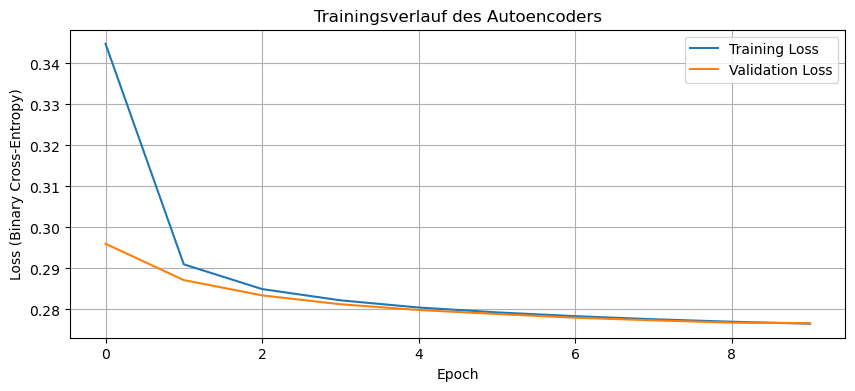

Finaler Trainingsloss: 0.276511
Finaler Validierungsloss: 0.276650


In [15]:
# Trainieren des Autoencoders
# Wir verwenden die verrauschten Bilder als Eingabe und die Originalbilder als Ziel
history = autoencoder.fit(
    x=X_train_noisy,          # Verrauschte Bilder als Eingabe
    y=X_train,                # Originalbilder als Ziel (was das Modell lernen soll)
    epochs=10,                # Anzahl der Trainingsdurchläufe über den gesamten Datensatz
    batch_size=128,           # Anzahl der Bilder pro Trainingsschritt
    shuffle=True,             # Daten zwischen den Epochen mischen
    validation_data=(X_test_noisy, X_test)  # Testdaten zur Validierung
)

# Verlauf des Trainings visualisieren
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Trainingsverlauf des Autoencoders')
plt.xlabel('Epoch')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.legend()
plt.grid(True)
plt.show()

# Informationen zum Trainingsverlauf ausgeben
print(f"Finaler Trainingsloss: {history.history['loss'][-1]:.6f}")
print(f"Finaler Validierungsloss: {history.history['val_loss'][-1]:.6f}")

<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 10:</b>
    
Wende die Methode `predict()` auf die Testbilder an und speichere das Ergebnis in einer Variablen.
</div>

In [16]:
# Anwenden des trainierten Autoencoders auf die verrauschten Testbilder
# Die predict()-Methode erzeugt die entrauschten Vorhersagen
decoded_images = autoencoder.predict(X_test_noisy)

# Überprüfen der Form der Ausgabe
print("Form der rekonstruierten Testdaten:", decoded_images.shape)

# Überprüfen des Wertebereichs
print("Minimaler Pixelwert in rekonstruierten Bildern:", decoded_images.min())
print("Maximaler Pixelwert in rekonstruierten Bildern:", decoded_images.max())
print("Durchschnittlicher Pixelwert in rekonstruierten Bildern:", decoded_images.mean())

# Optional: Berechnung der Rekonstruktionsgenauigkeit
from sklearn.metrics import mean_squared_error

# Mittlerer quadratischer Fehler zwischen Originalen und Rekonstruktionen
mse = mean_squared_error(X_test.reshape(-1), decoded_images.reshape(-1))
print(f"Mittlerer quadratischer Fehler: {mse:.6f}")

375/375 [==============================] - 6s 15ms/step
Form der rekonstruierten Testdaten: (12000, 28, 28)
Minimaler Pixelwert in rekonstruierten Bildern: 6.1253613e-10
Maximaler Pixelwert in rekonstruierten Bildern: 0.9848543
Durchschnittlicher Pixelwert in rekonstruierten Bildern: 0.27775782
Mittlerer quadratischer Fehler: 0.011098


<div class="alert alert-block alert-success">
&#128187; <b>Aufgabe 11:</b>
    
Geben Sie die verrauschte Bilder und die entsprechenden rekonstruierten Bilder aus.
</div>

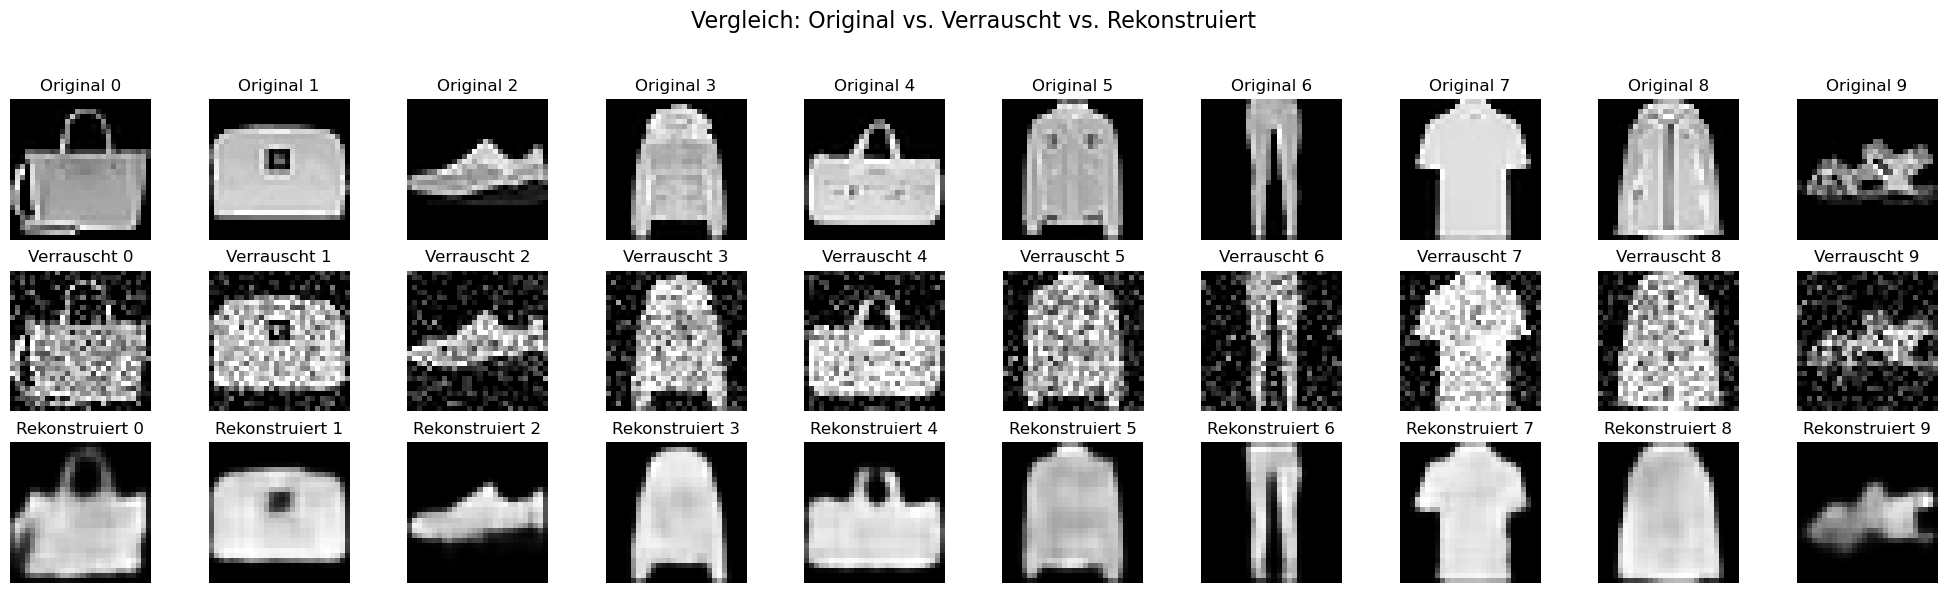

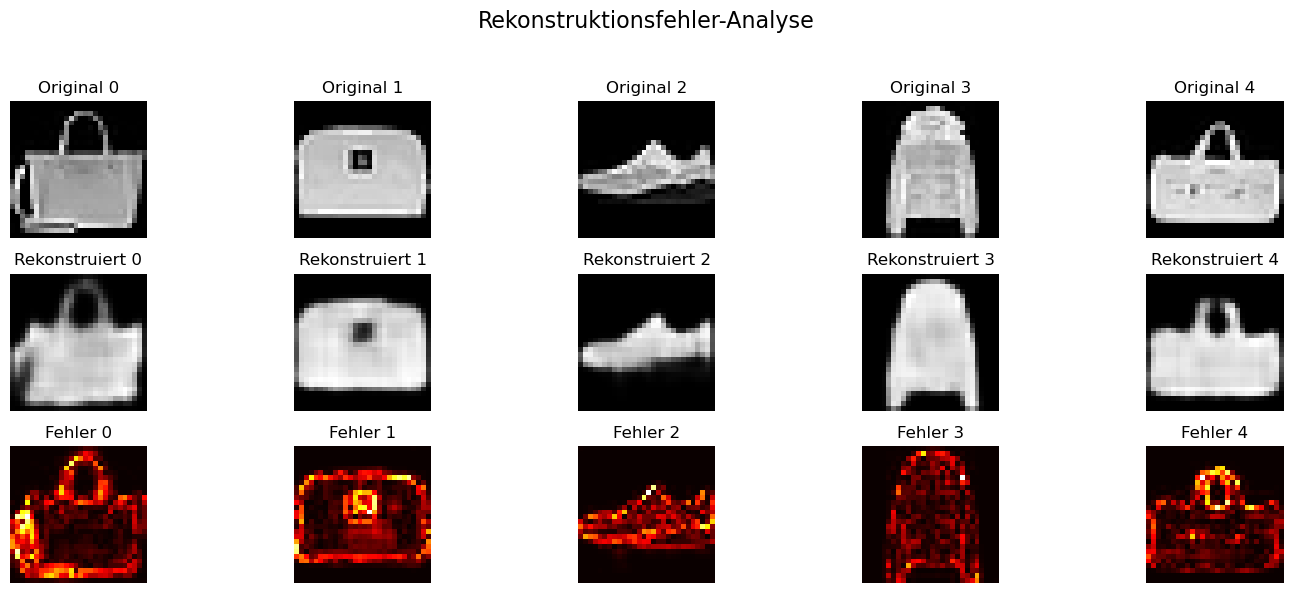

Durchschnittlicher Rekonstruktionsfehler pro Bild: 0.0555


In [ ]:
import numpy as np
# Anzahl der anzuzeigenden Bilder
n = 10
plt.figure(figsize=(20, 6))

# Für jeden Index der ausgewählten Bilder
for i in range(n):
    # 1. Original-Bild (ohne Rauschen)
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')
    
    # 2. Verrauschtes Bild
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_noisy[i], cmap='gray')
    plt.title(f"Verrauscht {i}")
    plt.axis('off')
    
    # 3. Rekonstruiertes Bild (entrauscht)
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_images[i], cmap='gray')
    plt.title(f"Rekonstruiert {i}")
    plt.axis('off')

plt.suptitle("Vergleich: Original vs. Verrauscht vs. Rekonstruiert", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Berechnung und Visualisierung des Rekonstruktionsfehlers für einige Beispiele
plt.figure(figsize=(15, 6))

for i in range(5):
    # Berechne absolute Differenz zwischen Original und Rekonstruktion
    diff = np.abs(X_test[i] - decoded_images[i])
    
    # Original-Bild
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Original {i}")
    plt.axis('off')
    
    # Rekonstruiertes Bild
    plt.subplot(3, 5, i + 6)
    plt.imshow(decoded_images[i], cmap='gray')
    plt.title(f"Rekonstruiert {i}")
    plt.axis('off')
    
    # Differenzbild (Fehler)
    plt.subplot(3, 5, i + 11)
    plt.imshow(diff, cmap='hot')
    plt.title(f"Fehler {i}")
    plt.axis('off')
    
plt.suptitle("Rekonstruktionsfehler-Analyse", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Berechnung des durchschnittlichen Rekonstruktionsfehlers pro Bild
mean_error = np.mean(np.abs(X_test - decoded_images))
print(f"Durchschnittlicher Rekonstruktionsfehler pro Bild: {mean_error:.4f}")